Upload the dataset to Colab
Import necessary libraries

In [15]:
# Upload the dataset to Colab
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")



Saving Dynamic_2017_2_0.csv to Dynamic_2017_2_0.csv


In [16]:
# Load the dataset
file_name = 'Dynamic_2017_2_0.csv'  # Replace with your file name
data = pd.read_csv(file_name)

# Display basic information
print(data.head())
print(data.info())
print(data.isnull().sum())


   S.no.   Name of State Name of District  \
0      1  ANDHRA PRADESH        Anantapur   
1      2  ANDHRA PRADESH         Chittoor   
2      3  ANDHRA PRADESH    East Godavari   
3      4  ANDHRA PRADESH           Guntur   
4      5  ANDHRA PRADESH           Kadapa   

   Recharge from rainfall During Monsoon Season  \
0                                      89200.23   
1                                     115718.55   
2                                     104140.05   
3                                      52942.86   
4                                      93311.68   

   Recharge from other sources During Monsoon Season  \
0                                           46136.12   
1                                           32389.60   
2                                           95383.56   
3                                           57011.90   
4                                           15869.52   

   Recharge from rainfall During Non Monsoon Season  \
0                             

In [17]:

# Fill missing values only for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Add a year column for dynamic prediction
data['Year'] = 2025  # Base year for the dataset

# Define features and target
features = [
    'Recharge from rainfall During Monsoon Season',
    'Recharge from other sources During Monsoon Season',
    'Recharge from rainfall During Non Monsoon Season',
    'Recharge from other sources During Non Monsoon Season',
    'Total Annual Ground Water Recharge',
    'Total Natural Discharges',
    'Annual Extractable Ground Water Resource',
    'Current Annual Ground Water Extraction For Irrigation',
    'Current Annual Ground Water Extraction For Domestic & Industrial Use',
    'Total Current Annual Ground Water Extraction',
    'Annual GW Allocation for Domestic Use as on 2025',
    'Net Ground Water Availability for future use',
    'Year'
]
target = 'Stage of Ground Water Extraction (%)'

# Split features (X) and target (y)
X = data[features]
y = data[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 69.76435100082054
R² Score: 0.9488760817901765


In [38]:
# Filter for a specific district and state
state = "MAHARASHTRA"
district = "PUNE"
year = 2030  # Change this to the desired prediction year

filtered_data = data[
    (data['Name of State'].str.upper() == state.upper()) &
    (data['Name of District'].str.upper() == district.upper())
]

if not filtered_data.empty:
    # Prepare features for prediction
    features_for_prediction = filtered_data[features].copy()
    features_for_prediction['Year'] = year  # Update year for prediction

    # Scale features
    features_for_prediction_scaled = scaler.transform(features_for_prediction)

    # Make prediction
    prediction = model.predict(features_for_prediction_scaled)
    print(f"Predicted Stage of Ground Water Extraction (%) for {district}, {state}, {year}: {prediction[0]}")
else:
    print(f"No data available for {district}, {state}")


Predicted Stage of Ground Water Extraction (%) for PUNE, MAHARASHTRA, 2030: 71.68270000000004


In [34]:

print(features_for_prediction.head())


    Recharge from rainfall During Monsoon Season  \
14                                      12375.64   

    Recharge from other sources During Monsoon Season  \
14                                              696.0   

    Recharge from rainfall During Non Monsoon Season  \
14                                          13629.49   

    Recharge from other sources During Non Monsoon Season  \
14                                              71.16       

    Total Annual Ground Water Recharge  Total Natural Discharges  \
14                            26772.29                   2849.44   

    Annual Extractable Ground Water Resource  \
14                                  23922.85   

    Current Annual Ground Water Extraction For Irrigation  \
14                                                0.0       

    Current Annual Ground Water Extraction For Domestic & Industrial Use  \
14                                              174.0                      

    Total Current Annual Ground Wa

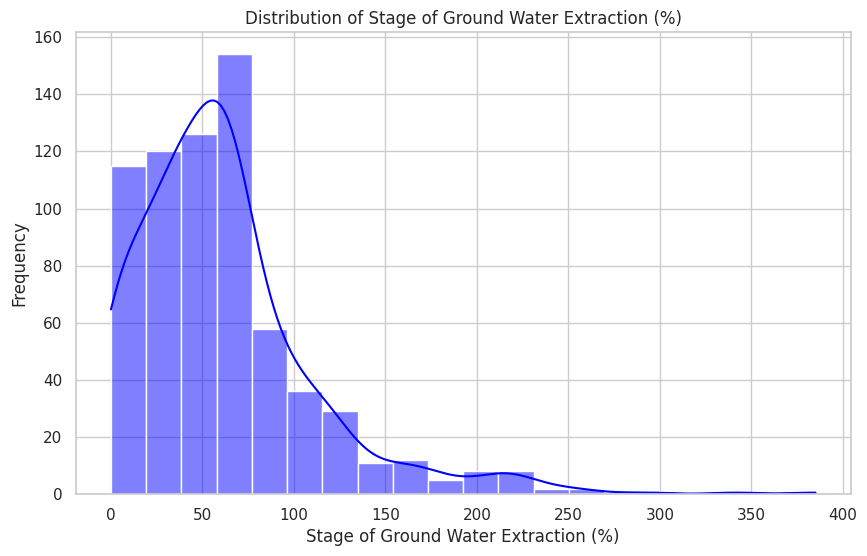

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Stage of Ground Water Extraction (%)'], kde=True, bins=20, color="blue")
plt.title("Distribution of Stage of Ground Water Extraction (%)")
plt.xlabel("Stage of Ground Water Extraction (%)")
plt.ylabel("Frequency")
plt.show()


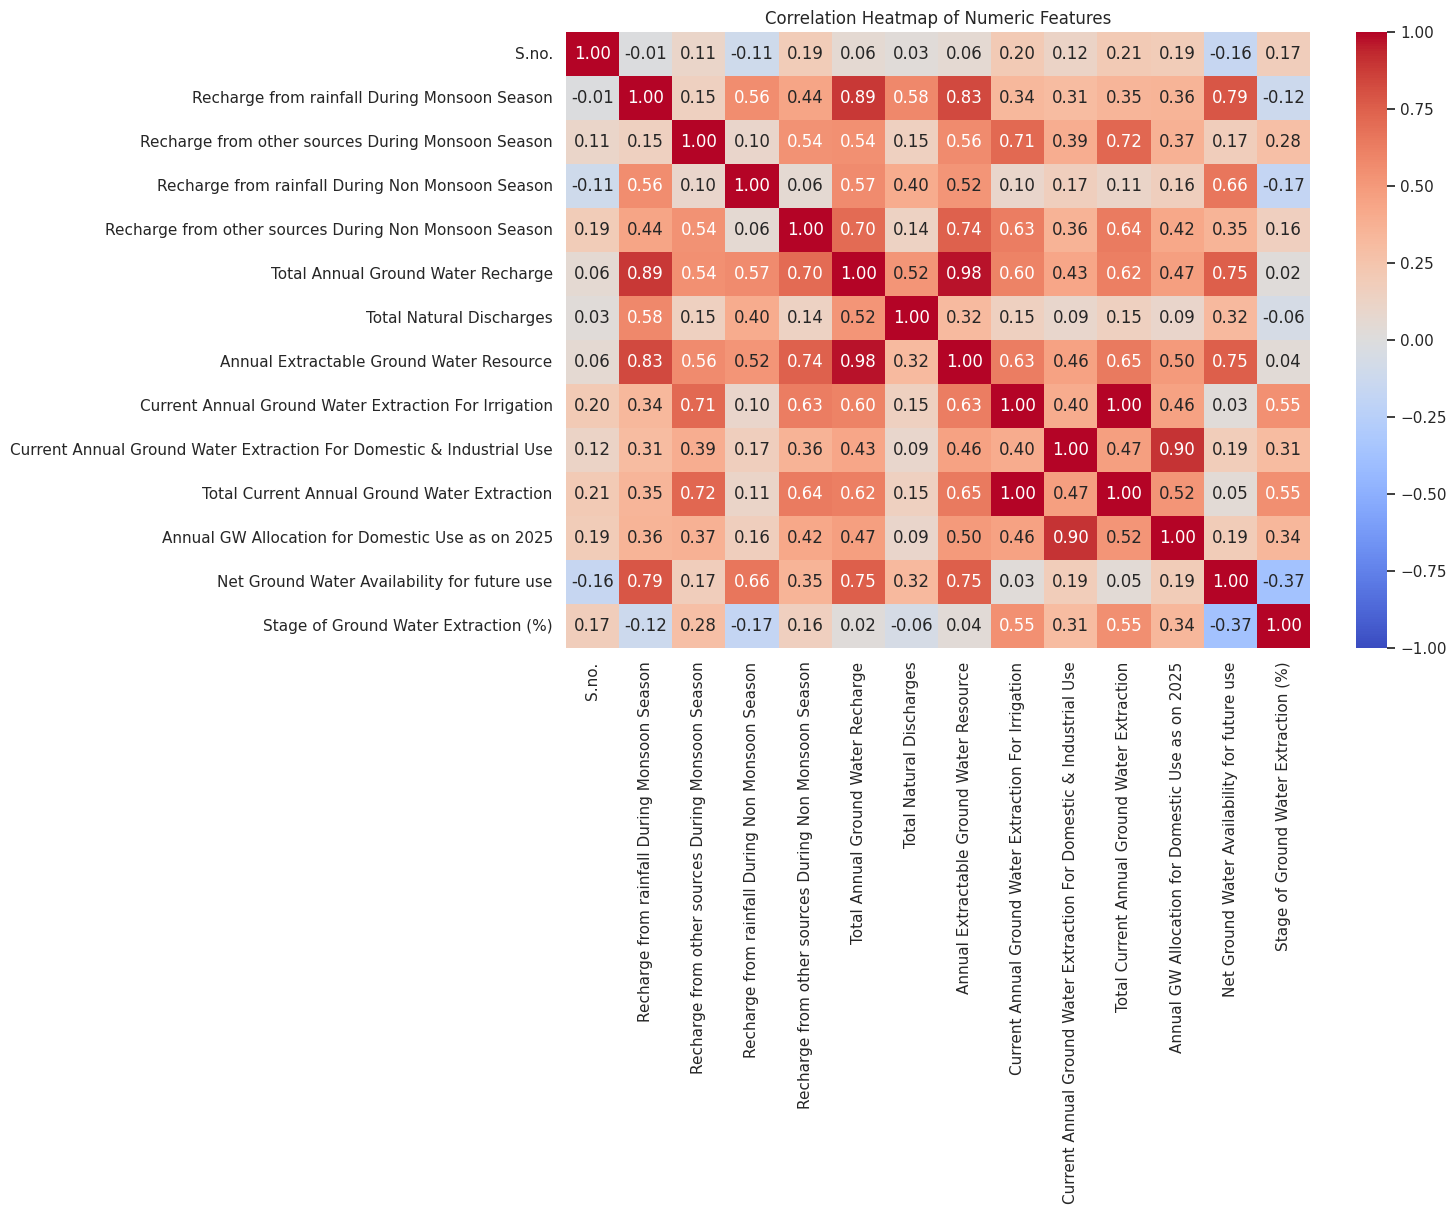

In [23]:
# Compute correlation matrix for numeric columns
corr_matrix = data[numeric_columns].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


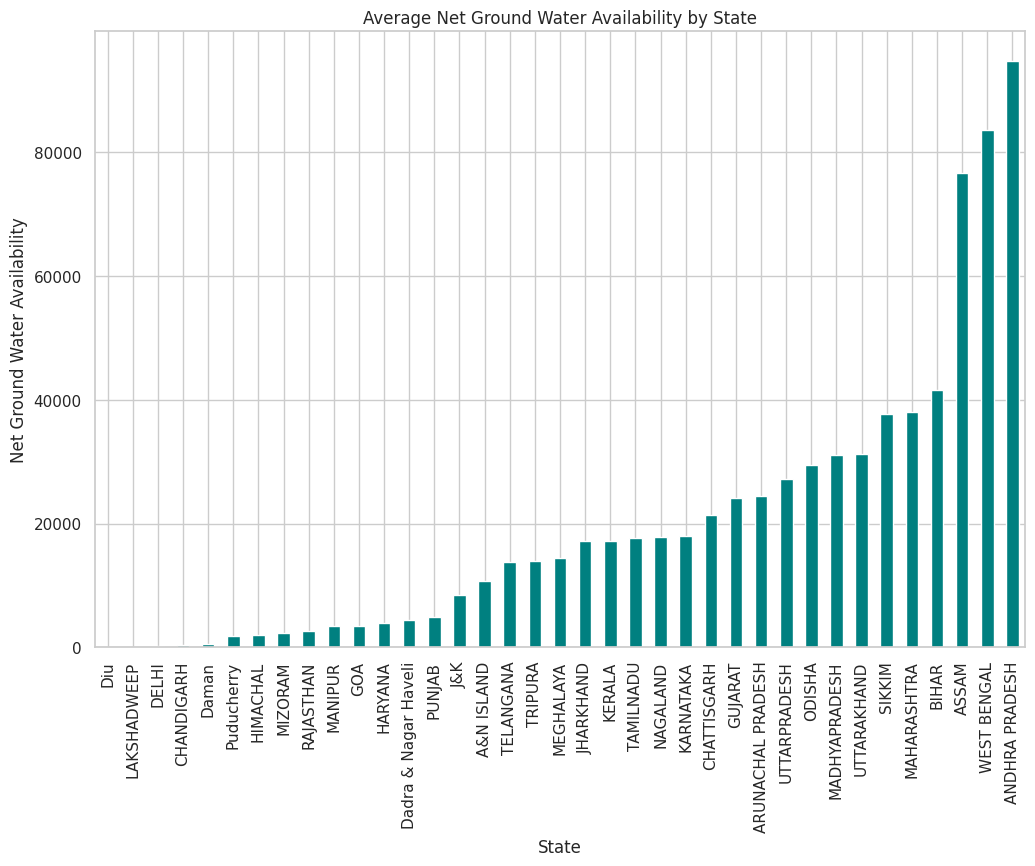

In [24]:
# Aggregate data by state
state_agg = data.groupby('Name of State')['Net Ground Water Availability for future use'].mean().sort_values()

# Bar plot
plt.figure(figsize=(12, 8))
state_agg.plot(kind='bar', color='teal')
plt.title("Average Net Ground Water Availability by State")
plt.ylabel("Net Ground Water Availability")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.show()


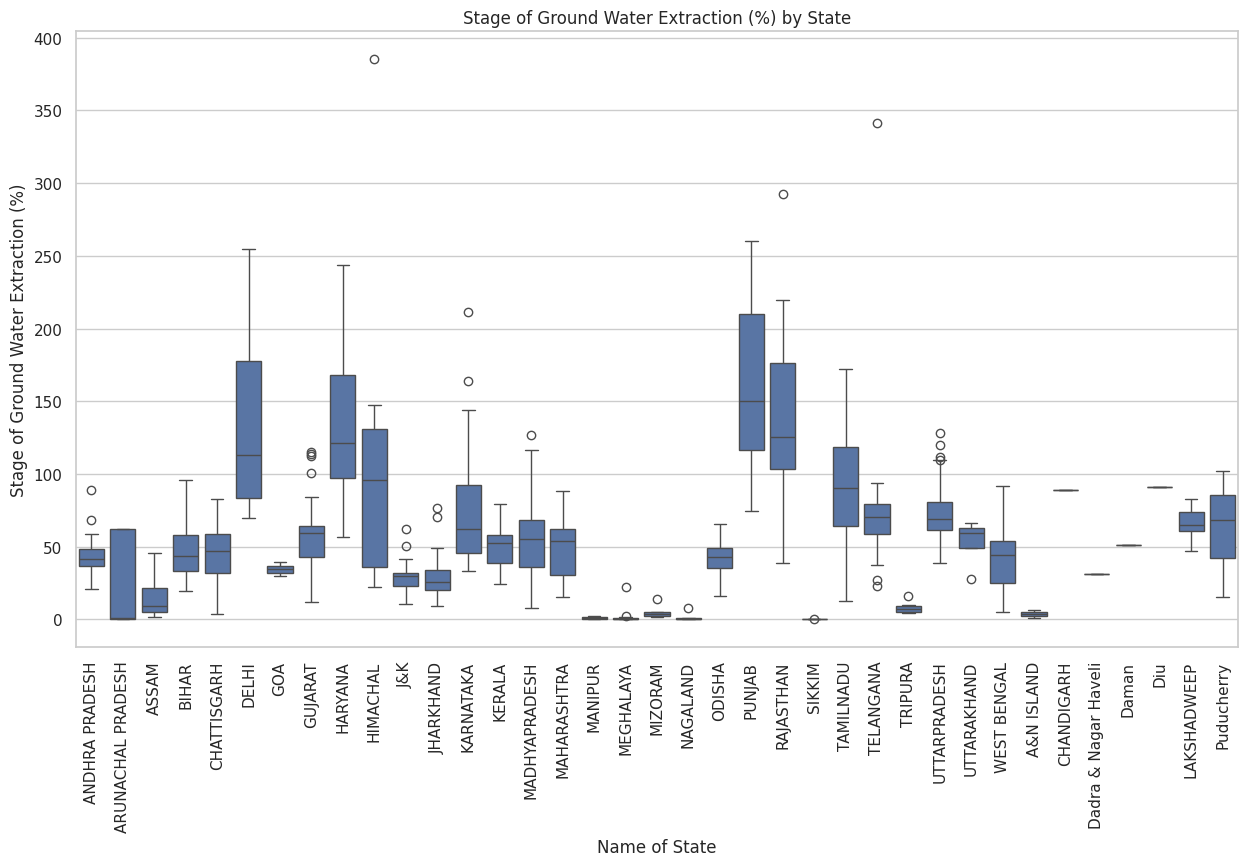

In [27]:
# Box plot to show distribution of `Stage of Ground Water Extraction (%)` by state
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='Name of State', y='Stage of Ground Water Extraction (%)')
plt.xticks(rotation=90)
plt.title("Stage of Ground Water Extraction (%) by State")
plt.show()
